<a href="https://colab.research.google.com/github/GNuSeekK/ICTCOG/blob/main/3_06_%5B%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5%5D_%ED%9A%8C%EA%B7%80_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀(Regression) 예측

수치형 값을 예측 (y의 값이 연속된 수치로 표현되는 것)

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
df = pd.DataFrame(
    data['data'],
    columns = data['feature_names']
)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

데이터 분할

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('MEDV', axis = 1),
    df['MEDV'],
    random_state = 42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

# 평가 지표 만들기

**MSE(Mean Squared Error)**

$$
MSE = \frac{1}{N} \sum_{i=1} ^n(\hat {y}_i - t_i)^2
$$
예측값($\hat{y}$)과 실제값($t$)의 차이에 대한 제곱을 해서 평균을 낸 값
    * 오차의 음수를 제거하는 역할
    * 오차를 미분 가능

**MAE(Mean Absolute Error)**

$$
MAE = \frac{1}{N} \sum_{i=1} ^n \left | \hat{y_i} - t \right |
$$

**RMSE(Root Mean Squared Error)**
$$
MSE = \sqrt{ \frac{1}{N} \sum_{i=1} ^n(\hat {y}_i - t_i)^2}
$$

$MSE$에 root를 씌운 값으로 실제 오차의 평균이라고 봐도 무방

In [8]:
# 예측값을 임시로 설정
pred = np.array([3.0, 4.0, 5.3])

# 각 데이터 들에 대한 정답
actual = np.array([1.0, 3.8, 6.8])

MSE 구현

In [9]:
def my_mean_squared_error(y,t):
    return ((y-t)**2).mean()

In [10]:
my_mean_squared_error(pred, actual)

2.0966666666666667

[번외] pred의 예측값을 actual에 가깝게 바꿔보고 MSE 확인

In [11]:
better_pred = np.array([1.1, 4.0, 6.7])
actual = np.array([1.0, 3.8, 6.8])

my_mean_squared_error(better_pred, actual)

0.020000000000000004

MAE 구현 ( 절대값 : np.abs() )

In [12]:
def my_mean_absolute_error(y, t):
  return np.abs(y - t).mean()

In [13]:
pred = np.array([3.0, 4.0, 5.3])
my_mean_absolute_error(pred, actual)

1.2333333333333334

In [14]:
my_mean_absolute_error(better_pred, actual)

0.1333333333333333

RMSE 구현

In [15]:
def my_root_mean_squared_error(y,t):
    return np.sqrt(my_mean_squared_error(y,t))

In [16]:
my_root_mean_squared_error(pred, actual), my_root_mean_squared_error(better_pred, actual)

(1.4479871085982314, 0.14142135623730953)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

사이킷 런에서 mse, mae 가져오기

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
pred = model.predict(X_test)

# 시각화로 확인해보기

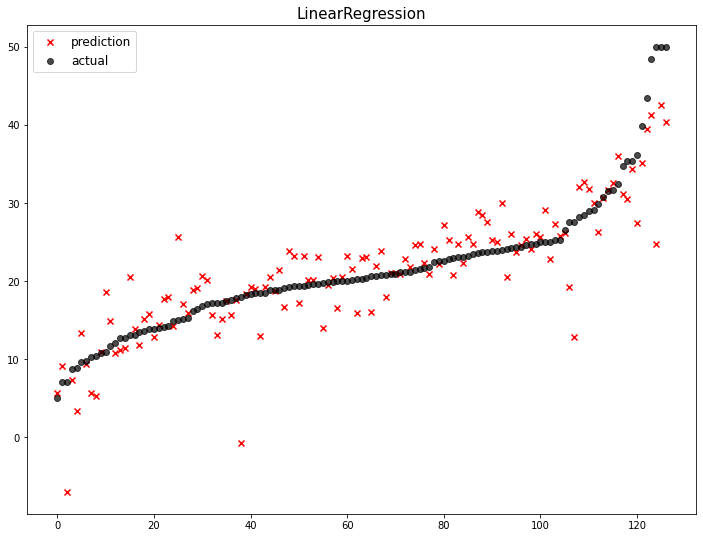

              model        mse
0  LinearRegression  22.098695


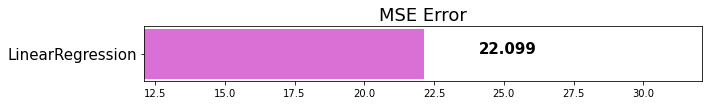

In [24]:
mse_eval('LinearRegression', pred, y_test)

# LinearRegression의 수식

$$
x = \left [x_1, x_2, x_3, \cdots, x_n  \right]
$$

$$
w = \left [w_1, w_2, w_3, \cdots, w_n  \right]
$$

$$
y = w_1x_1 + w_2x_2 + w_3x_3 + \cdots + w_nx_n + b
$$

* 가중치(W), 편향(b)
* 입력값이 1개($x_1$)만 있다면 수식은 $y=w_1x_1 + b$로 정리된다.

# 가중치(**Weight**)의 의미
* 입력되고 있는 데이터(x)들의 각각의 중요도를 판단하는 것
  * 어떤 중요도? : 예측값 ($\hat{y}$)에 얼마나 많이 영향을 끼칠 것인가
* 가중치의 절대값이 커지면 예측값에 영향을 많이 미친다
    * **모델이 복잡해 진다**
* 가중치의 절댓값이 작아지면 예측값에 영향을 덜 미친다.
    * **모델이 단순해 진다**

# LinearRegression은 가중치를 조절할 방법이 없다.
* 데이터 준비가 완료된 상황에서 LinearRegression은 복잡도를 조절할 방법이 없다.

## 규제($\alpha$ - Regularization)를 사용하는 모델
* $\alpha$를 이용해서 가중치를 **규제**
* $\alpha$의 역할 : 가중치에 penalty 부여(또는 람다($\lambda$))

### 규제 방식
**L2 규제(L2 Regularization)**
  * 각 **가중치 제곱의 합**에 규제 강도인 $\alpha$를 곱하여 오차에 더한다.
    * $\alpha$를 크게 하면 가중치가 더 많이 감소 (규제를 더 중요하게 생각하겠다)
    * $\alpha$를 작게 하면 가중치가 증가 (규제를 중요하게 생각하지 않는다)

**L1 규제(L1 Regularization)**
* **가중치의 합**을 더한 값에 규제 강도인 ($\alpha$)를 곱하여 오차에 더한다.
* 어떤 가중치는 실제 0이 되어버린다. 즉 모델에서 완전히 제외되는 특성이 생긴다.

---
* L2 규제 : 모든 가중치를 0에 가깝게 만들 뿐, 0으로 만들지는 않는다
* L1 규제 : 모든 가중치를 0에 가깝게 만들다가, 실제 0으로 만드는 가중치 생김
    * 실제 가중치가 0이 되어버린다 => 특성을 사용하지 않는다는 의미...
---
**L2 규제 - 릿지(Ridge)**
$$
E = MSE + \alpha \sum {w}^2
$$
**L1 규제 - 라쏘(Lasso)**
$$
E = MSE + \alpha \sum |{w}|
$$

**L2 규제가 L1 규제에 비해 안정적이라 일반적으로는 L2 규제가 더 많이 사용 된다**

In [25]:
from sklearn.linear_model import Ridge

In [26]:
# alpha를 여러 단계로 준비
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001] # log 스케일로 조정하는게 좋다 

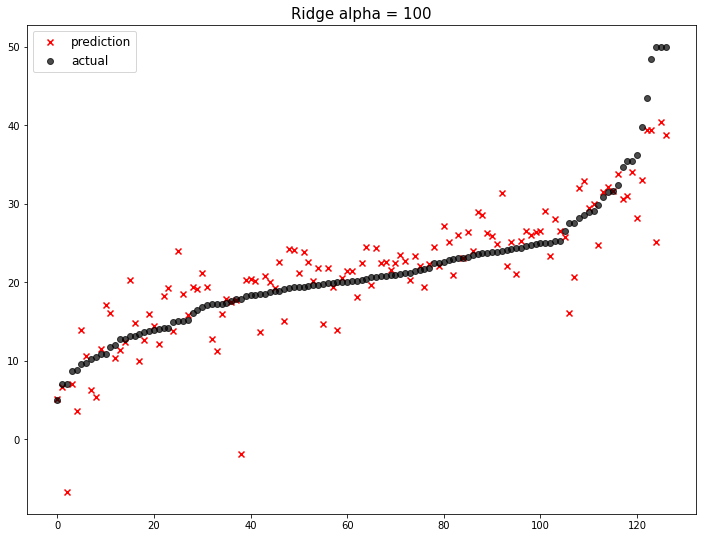

               model        mse
0  Ridge alpha = 100  22.727346
1   LinearRegression  22.098695


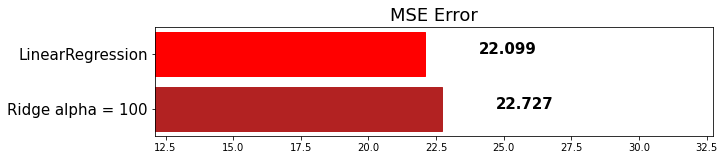

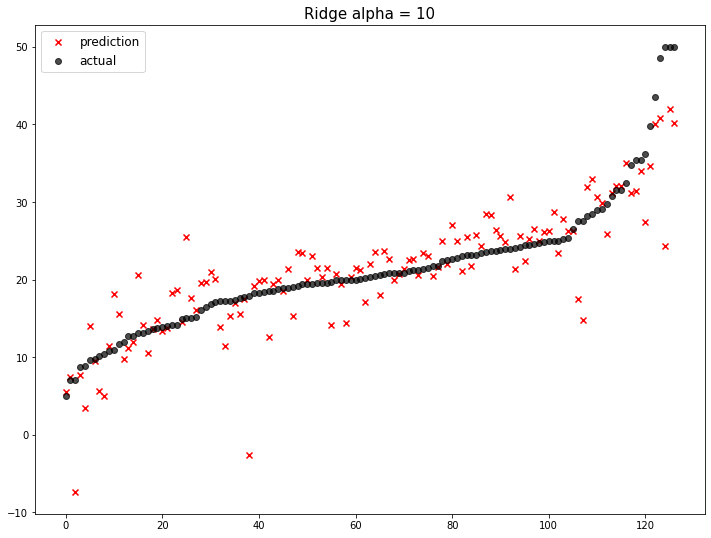

               model        mse
0   Ridge alpha = 10  22.939229
1  Ridge alpha = 100  22.727346
2   LinearRegression  22.098695


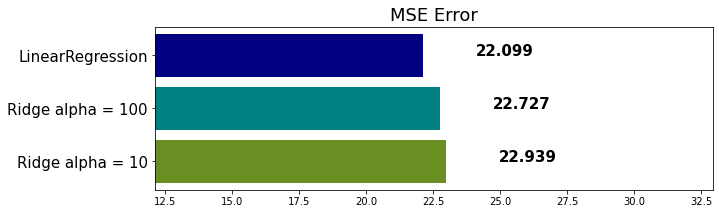

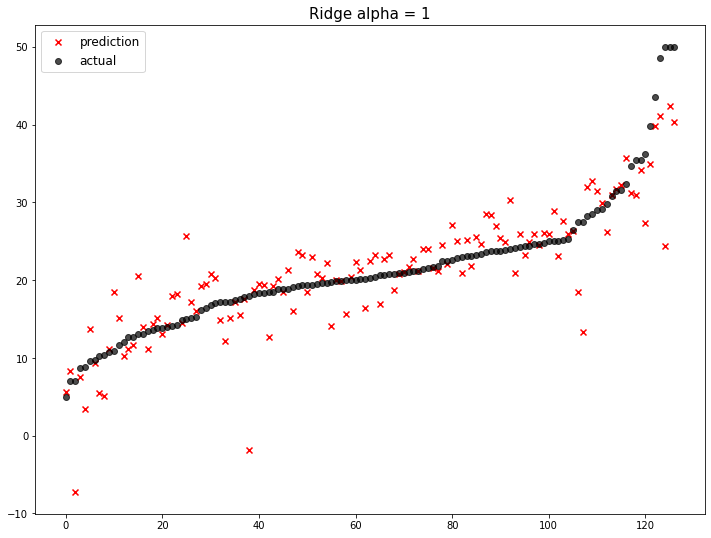

               model        mse
0   Ridge alpha = 10  22.939229
1  Ridge alpha = 100  22.727346
2    Ridge alpha = 1  22.480476
3   LinearRegression  22.098695


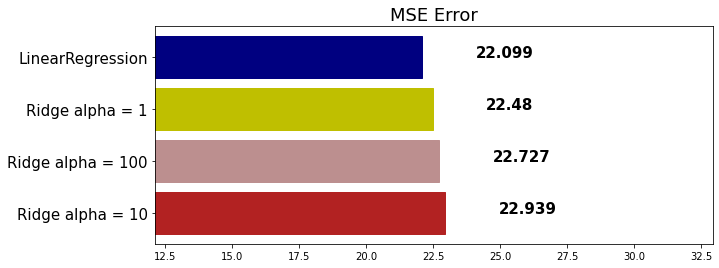

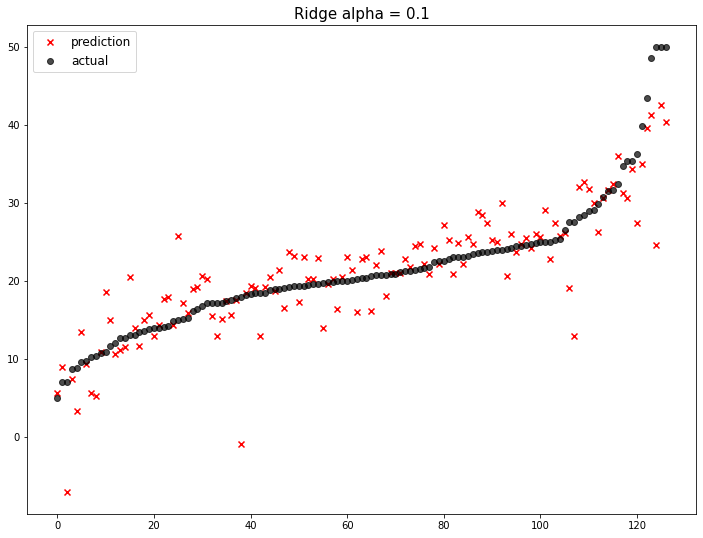

               model        mse
0   Ridge alpha = 10  22.939229
1  Ridge alpha = 100  22.727346
2    Ridge alpha = 1  22.480476
3  Ridge alpha = 0.1  22.142233
4   LinearRegression  22.098695


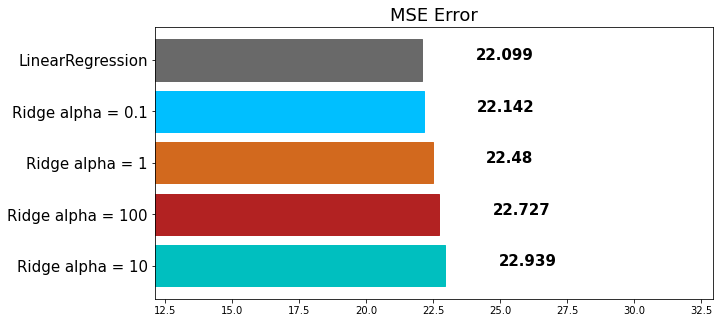

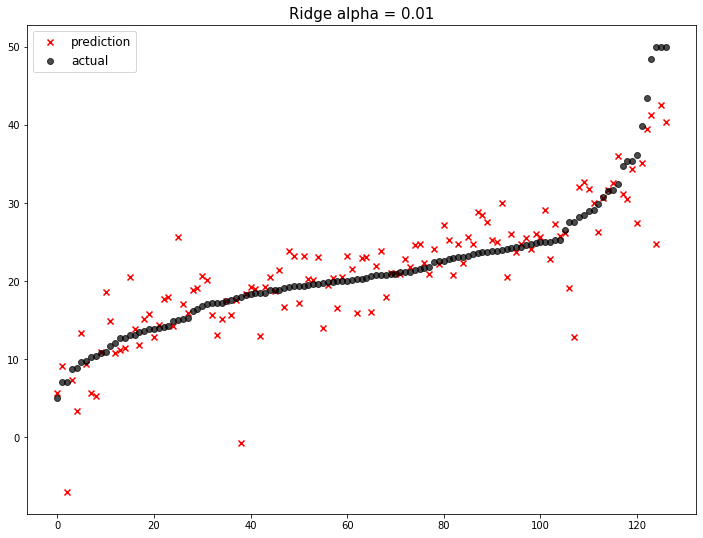

                model        mse
0    Ridge alpha = 10  22.939229
1   Ridge alpha = 100  22.727346
2     Ridge alpha = 1  22.480476
3   Ridge alpha = 0.1  22.142233
4  Ridge alpha = 0.01  22.102934
5    LinearRegression  22.098695


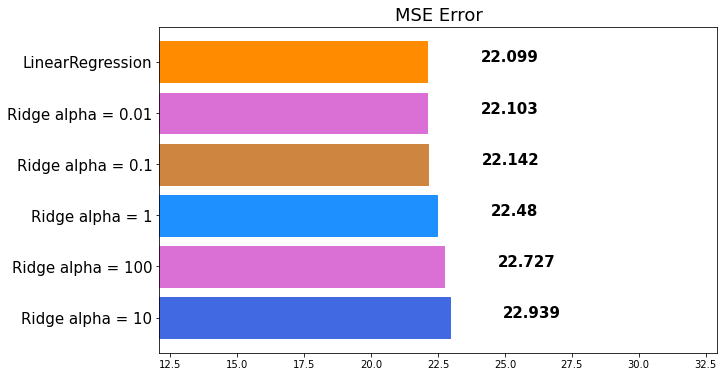

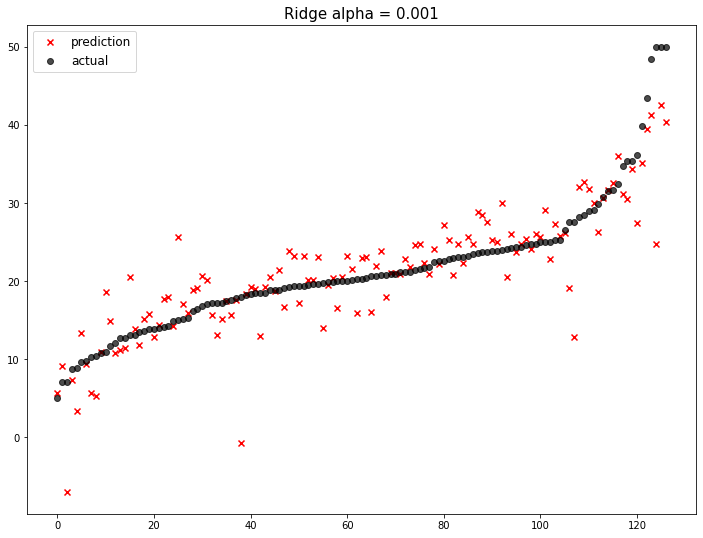

                 model        mse
0     Ridge alpha = 10  22.939229
1    Ridge alpha = 100  22.727346
2      Ridge alpha = 1  22.480476
3    Ridge alpha = 0.1  22.142233
4   Ridge alpha = 0.01  22.102934
5  Ridge alpha = 0.001  22.099117
6     LinearRegression  22.098695


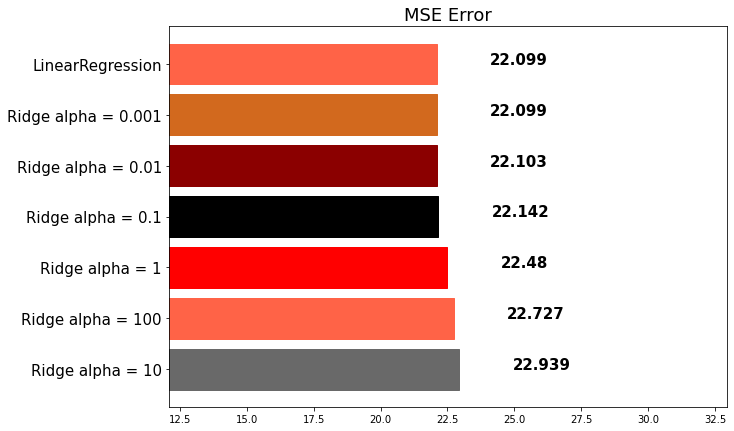

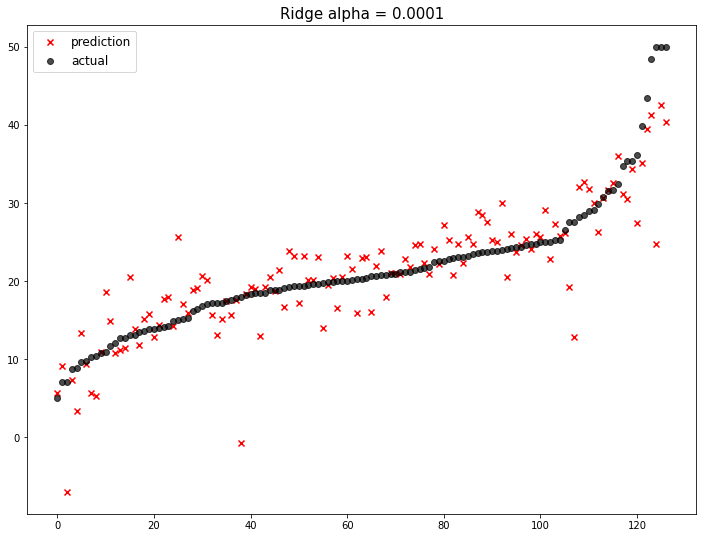

                  model        mse
0      Ridge alpha = 10  22.939229
1     Ridge alpha = 100  22.727346
2       Ridge alpha = 1  22.480476
3     Ridge alpha = 0.1  22.142233
4    Ridge alpha = 0.01  22.102934
5   Ridge alpha = 0.001  22.099117
6  Ridge alpha = 0.0001  22.098737
7      LinearRegression  22.098695


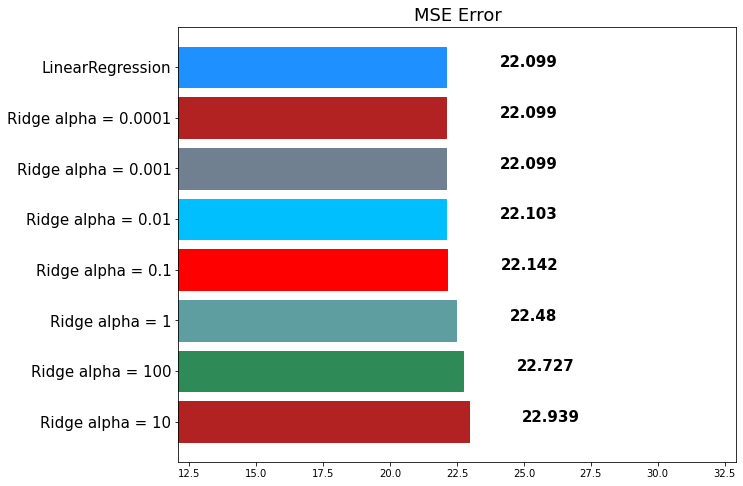

In [27]:
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)

    pred = ridge.predict(X_test)
    mse_eval('Ridge alpha = {}'.format(alpha), pred, y_test)

Ridge에 의해 설정된 가중치 확인하기

In [28]:
def plot_coef(columns, coef):
  coef_df = pd.DataFrame(list(zip(columns, coef)))
  coef_df.columns = ["feature", "coef"]

  coef_df = coef_df.sort_values(by="coef", ascending=False).reset_index(drop=True)

  fig, ax = plt.subplots(figsize=(9, 7))
  ax.barh(np.arange(len(coef_df)), coef_df['coef'])
  
  idx = np.arange(len(coef_df))
  ax.set_yticks(idx)
  ax.set_yticklabels(coef_df['feature'])
  fig.tight_layout()
  plt.show()

선형 모델의 `coef_`를 실행하면 각 feature별 가중치 값이 나온다.

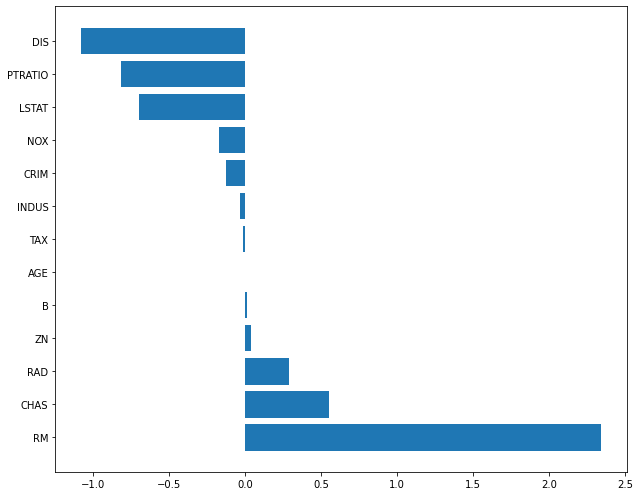

In [29]:
# alpha가 100일 때의 가중치 값 (alpha가 크기 때문에 가중치는 낮을 것...)
ridge100 = Ridge(alpha=100)
ridge100.fit(X_train, y_train)

plot_coef(X_train.columns, ridge100.coef_)

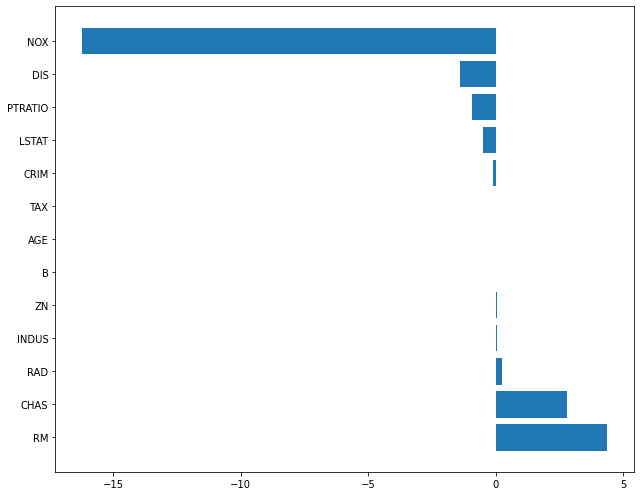

In [30]:
# alpha = 0.0001
ridge0001 = Ridge(alpha = 0.0001)
ridge0001.fit(X_train, y_train)

plot_coef(X_train.columns, ridge0001.coef_)

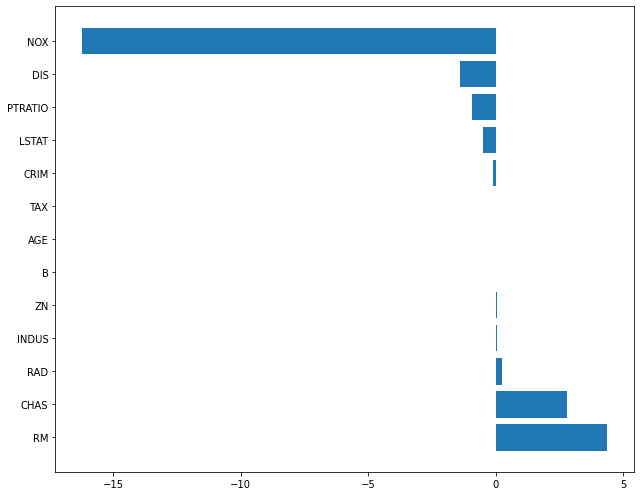

In [ ]:
# 선형 회귀의 가중치는?
plot_coef(X_train.columns, model.coef_)

라쏘 모델 확인하기

In [31]:
from sklearn.linear_model import Lasso

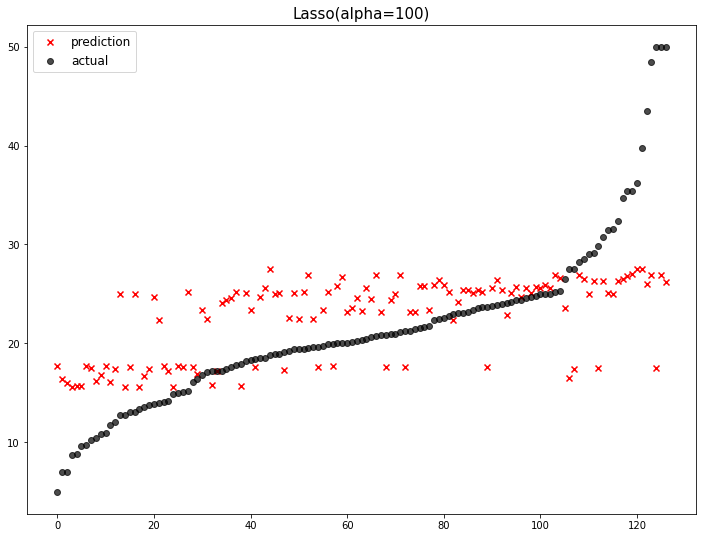

                  model        mse
0      Lasso(alpha=100)  51.951655
1      Ridge alpha = 10  22.939229
2     Ridge alpha = 100  22.727346
3       Ridge alpha = 1  22.480476
4     Ridge alpha = 0.1  22.142233
5    Ridge alpha = 0.01  22.102934
6   Ridge alpha = 0.001  22.099117
7  Ridge alpha = 0.0001  22.098737
8      LinearRegression  22.098695


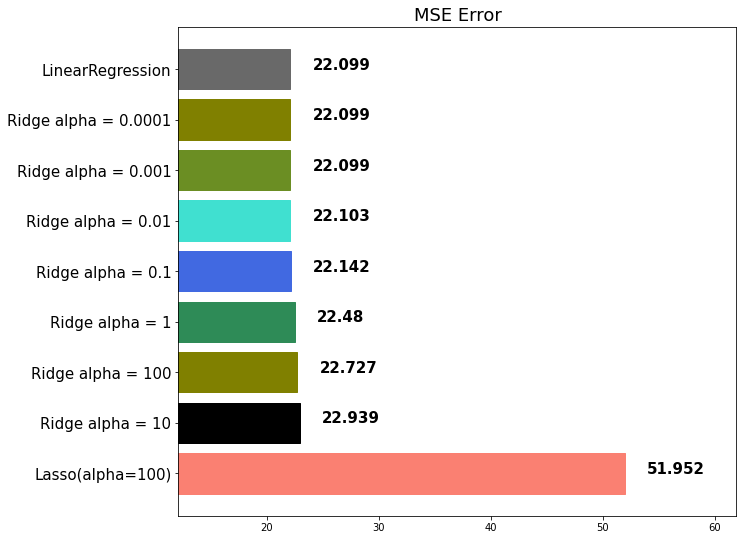

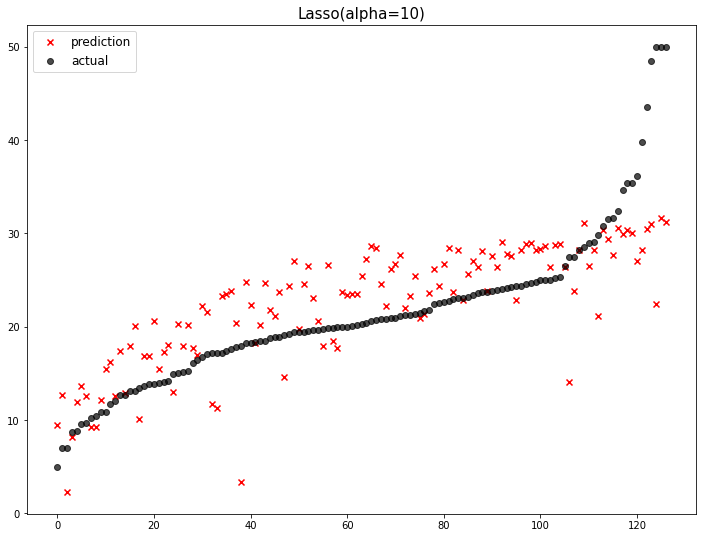

                  model        mse
0      Lasso(alpha=100)  51.951655
1       Lasso(alpha=10)  35.391738
2      Ridge alpha = 10  22.939229
3     Ridge alpha = 100  22.727346
4       Ridge alpha = 1  22.480476
5     Ridge alpha = 0.1  22.142233
6    Ridge alpha = 0.01  22.102934
7   Ridge alpha = 0.001  22.099117
8  Ridge alpha = 0.0001  22.098737
9      LinearRegression  22.098695


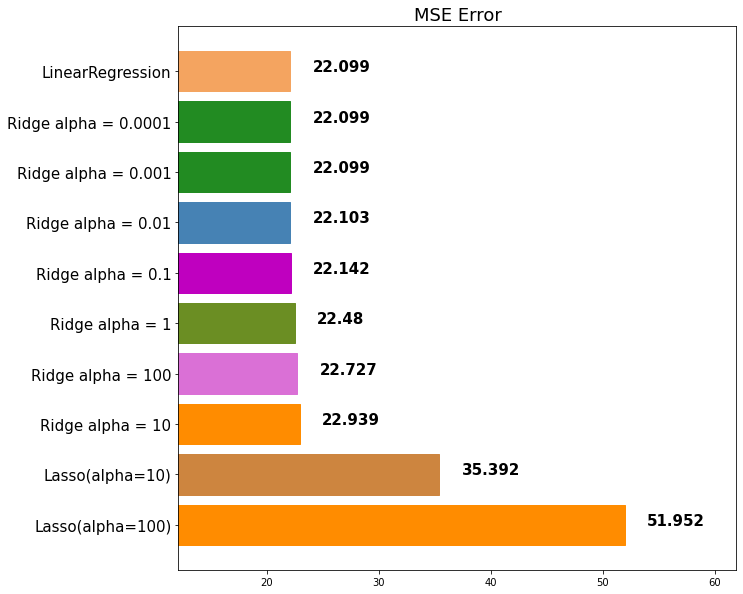

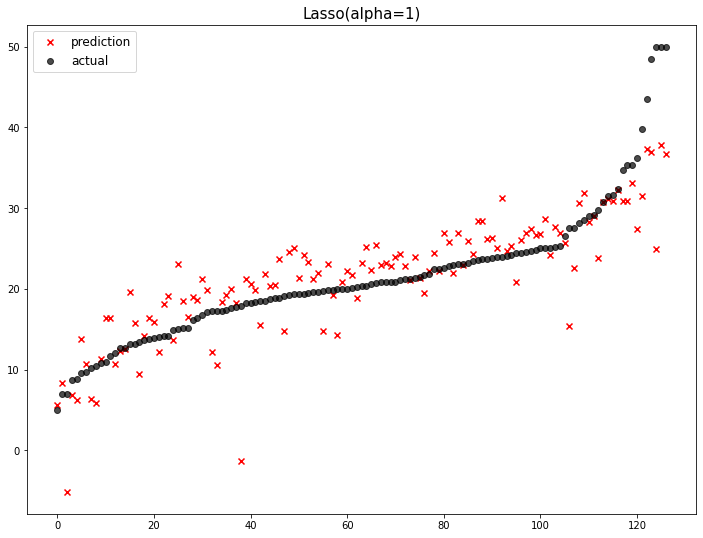

                   model        mse
0       Lasso(alpha=100)  51.951655
1        Lasso(alpha=10)  35.391738
2         Lasso(alpha=1)  24.390753
3       Ridge alpha = 10  22.939229
4      Ridge alpha = 100  22.727346
5        Ridge alpha = 1  22.480476
6      Ridge alpha = 0.1  22.142233
7     Ridge alpha = 0.01  22.102934
8    Ridge alpha = 0.001  22.099117
9   Ridge alpha = 0.0001  22.098737
10      LinearRegression  22.098695


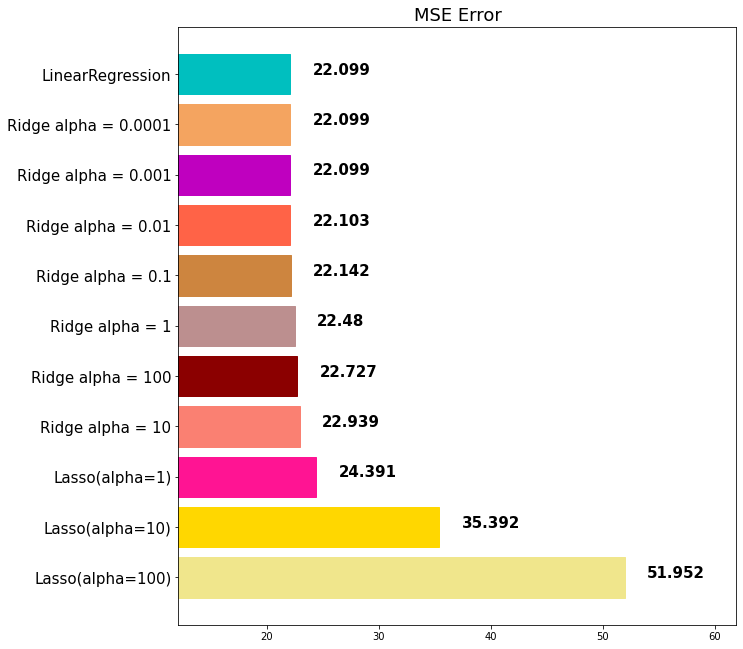

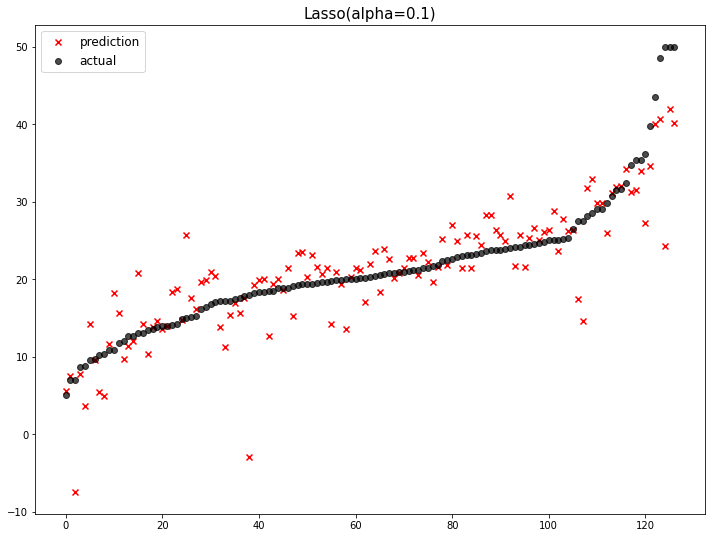

                   model        mse
0       Lasso(alpha=100)  51.951655
1        Lasso(alpha=10)  35.391738
2         Lasso(alpha=1)  24.390753
3       Lasso(alpha=0.1)  23.385884
4       Ridge alpha = 10  22.939229
5      Ridge alpha = 100  22.727346
6        Ridge alpha = 1  22.480476
7      Ridge alpha = 0.1  22.142233
8     Ridge alpha = 0.01  22.102934
9    Ridge alpha = 0.001  22.099117
10  Ridge alpha = 0.0001  22.098737
11      LinearRegression  22.098695


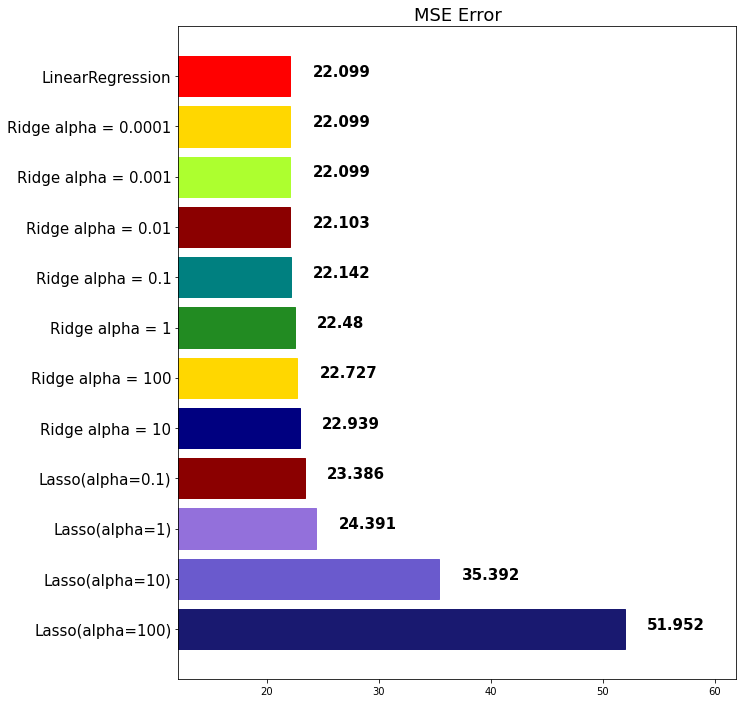

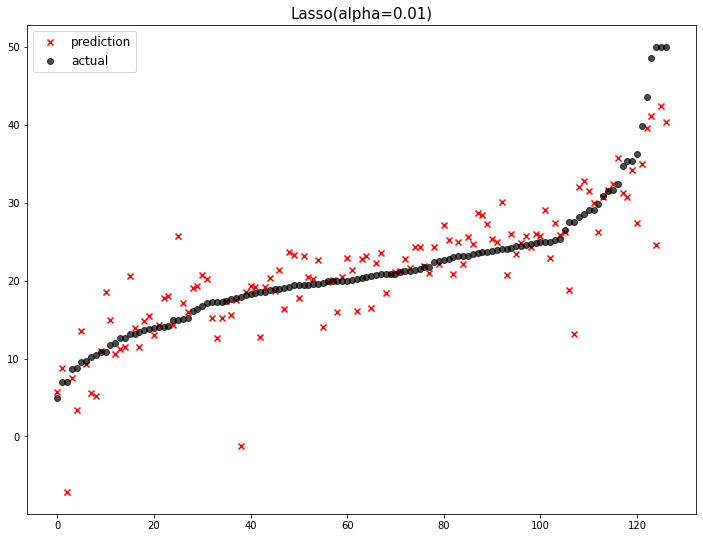

                   model        mse
0       Lasso(alpha=100)  51.951655
1        Lasso(alpha=10)  35.391738
2         Lasso(alpha=1)  24.390753
3       Lasso(alpha=0.1)  23.385884
4       Ridge alpha = 10  22.939229
5      Ridge alpha = 100  22.727346
6        Ridge alpha = 1  22.480476
7      Lasso(alpha=0.01)  22.210557
8      Ridge alpha = 0.1  22.142233
9     Ridge alpha = 0.01  22.102934
10   Ridge alpha = 0.001  22.099117
11  Ridge alpha = 0.0001  22.098737
12      LinearRegression  22.098695


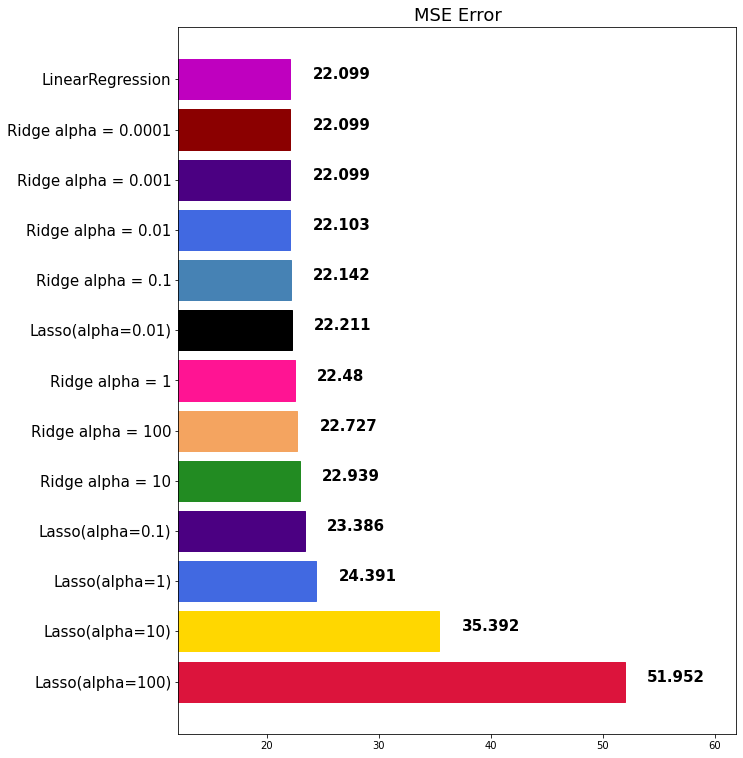

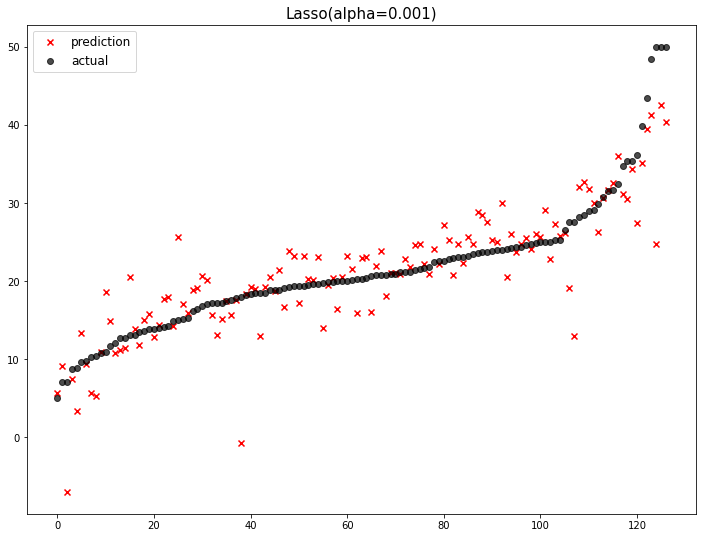

                   model        mse
0       Lasso(alpha=100)  51.951655
1        Lasso(alpha=10)  35.391738
2         Lasso(alpha=1)  24.390753
3       Lasso(alpha=0.1)  23.385884
4       Ridge alpha = 10  22.939229
5      Ridge alpha = 100  22.727346
6        Ridge alpha = 1  22.480476
7      Lasso(alpha=0.01)  22.210557
8      Ridge alpha = 0.1  22.142233
9     Lasso(alpha=0.001)  22.106454
10    Ridge alpha = 0.01  22.102934
11   Ridge alpha = 0.001  22.099117
12  Ridge alpha = 0.0001  22.098737
13      LinearRegression  22.098695


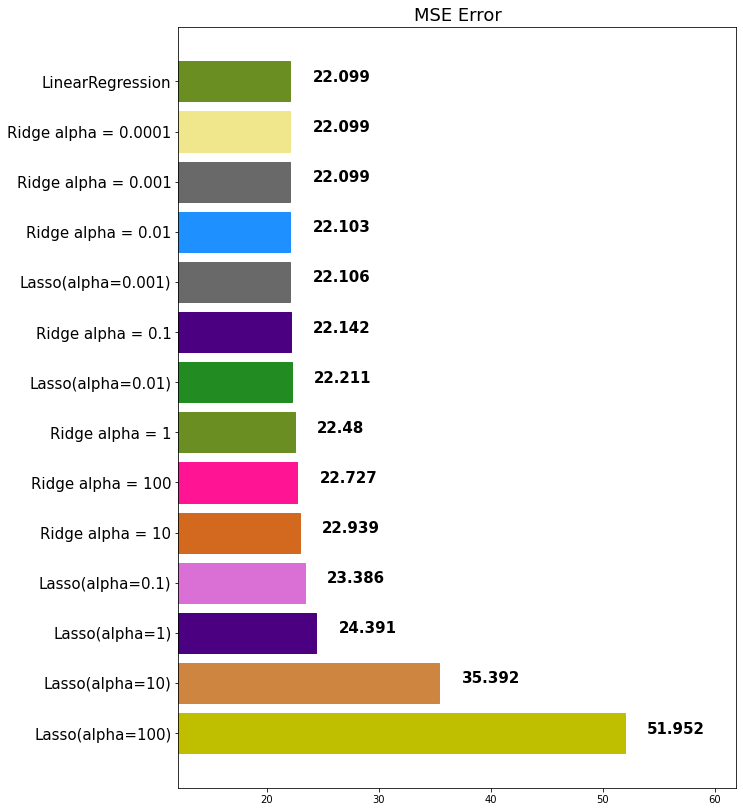

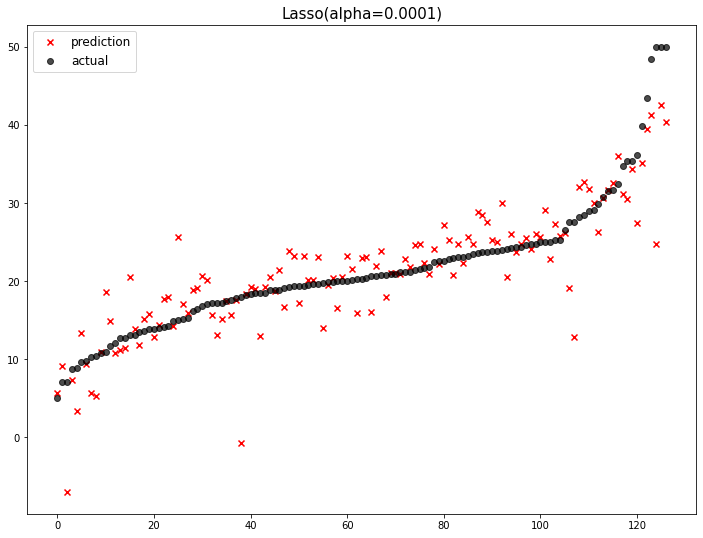

                   model        mse
0       Lasso(alpha=100)  51.951655
1        Lasso(alpha=10)  35.391738
2         Lasso(alpha=1)  24.390753
3       Lasso(alpha=0.1)  23.385884
4       Ridge alpha = 10  22.939229
5      Ridge alpha = 100  22.727346
6        Ridge alpha = 1  22.480476
7      Lasso(alpha=0.01)  22.210557
8      Ridge alpha = 0.1  22.142233
9     Lasso(alpha=0.001)  22.106454
10    Ridge alpha = 0.01  22.102934
11   Lasso(alpha=0.0001)  22.099436
12   Ridge alpha = 0.001  22.099117
13  Ridge alpha = 0.0001  22.098737
14      LinearRegression  22.098695


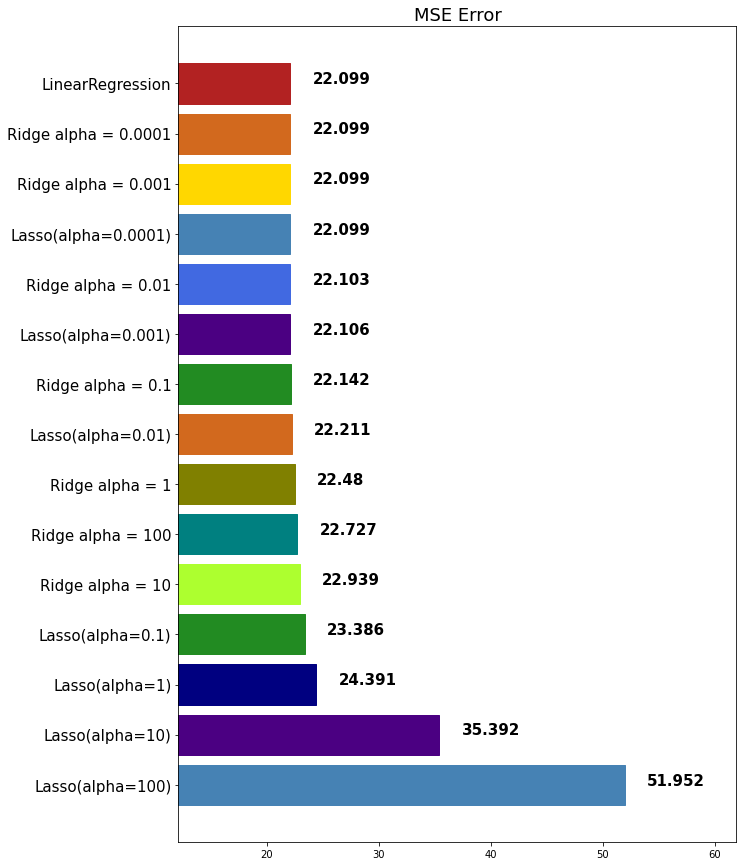

In [32]:
for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)

  pred = lasso.predict(X_test)
  mse_eval("Lasso(alpha={})".format(alpha), pred, y_test)

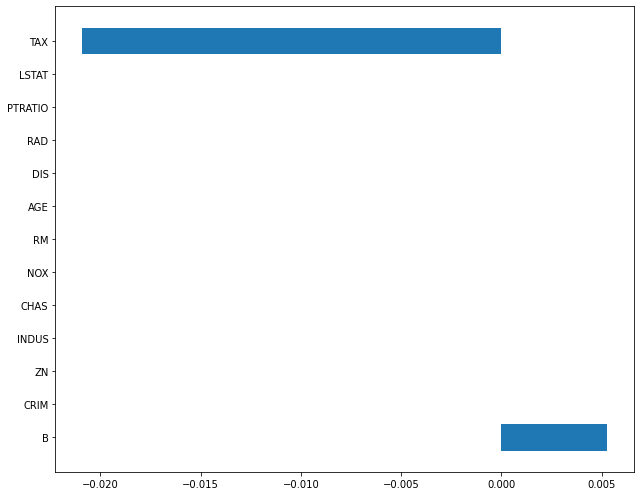

In [33]:
lasso100 = Lasso(alpha=100)
lasso100.fit(X_train, y_train)

plot_coef(X_train.columns, lasso100.coef_)

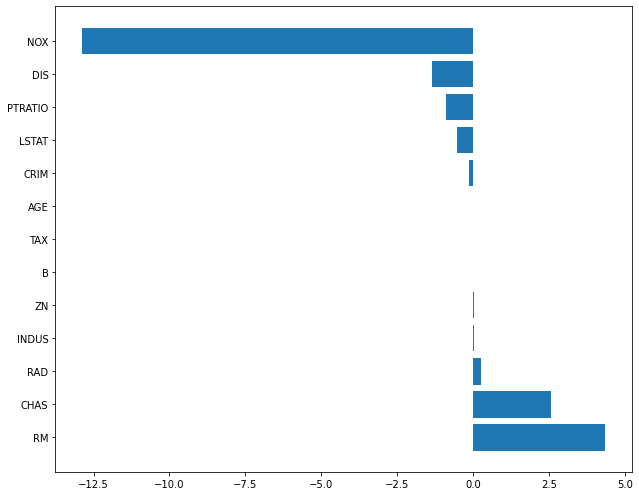

In [34]:
lasso001 = Lasso(alpha=0.01)
lasso001.fit(X_train, y_train)

plot_coef(X_train.columns, lasso001.coef_)

# ElasticNet
* Ridge와 Lasso의 규제 방식을 같이 사용
* `l1_ratio` 파라미터를 사용. 기본은 `0.5`
  * `l1_ratio = 0` ( L2만 사용하겠다 --> Ridge와 같음 )
  * `l1_ratio = 1` ( L1만 사용하겠다 --> Lasso와 같음 )
  * `0 < l1_ratio < 1` (L1과 L2의 혼합 사용)

In [35]:
from sklearn.linear_model import ElasticNet

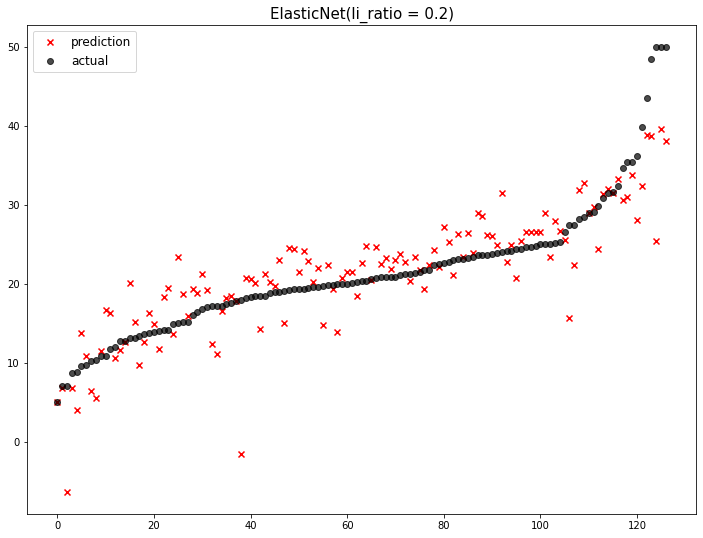

                         model        mse
0             Lasso(alpha=100)  51.951655
1              Lasso(alpha=10)  35.391738
2               Lasso(alpha=1)  24.390753
3             Lasso(alpha=0.1)  23.385884
4   ElasticNet(li_ratio = 0.2)  23.095135
5             Ridge alpha = 10  22.939229
6            Ridge alpha = 100  22.727346
7              Ridge alpha = 1  22.480476
8            Lasso(alpha=0.01)  22.210557
9            Ridge alpha = 0.1  22.142233
10          Lasso(alpha=0.001)  22.106454
11          Ridge alpha = 0.01  22.102934
12         Lasso(alpha=0.0001)  22.099436
13         Ridge alpha = 0.001  22.099117
14        Ridge alpha = 0.0001  22.098737
15            LinearRegression  22.098695


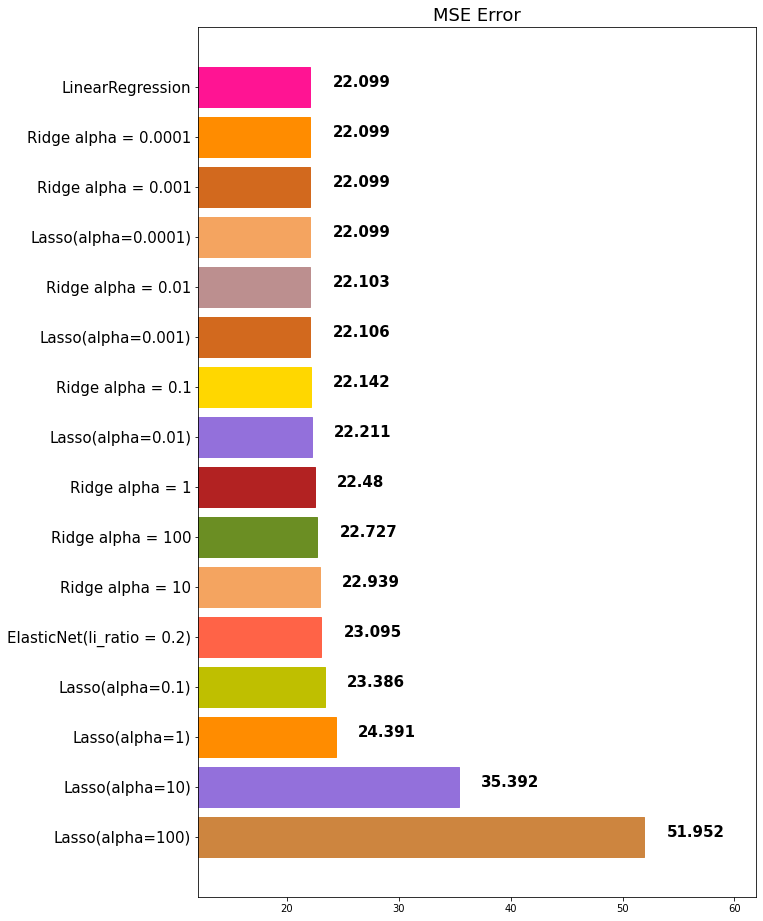

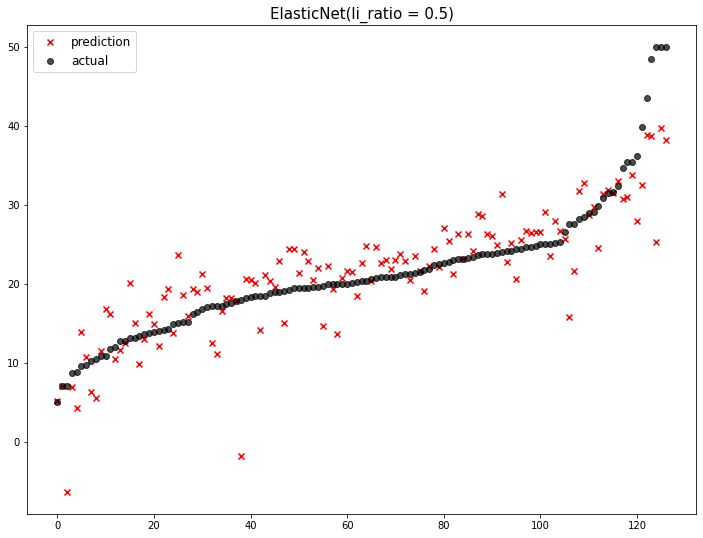

                         model        mse
0             Lasso(alpha=100)  51.951655
1              Lasso(alpha=10)  35.391738
2               Lasso(alpha=1)  24.390753
3             Lasso(alpha=0.1)  23.385884
4   ElasticNet(li_ratio = 0.5)  23.130204
5   ElasticNet(li_ratio = 0.2)  23.095135
6             Ridge alpha = 10  22.939229
7            Ridge alpha = 100  22.727346
8              Ridge alpha = 1  22.480476
9            Lasso(alpha=0.01)  22.210557
10           Ridge alpha = 0.1  22.142233
11          Lasso(alpha=0.001)  22.106454
12          Ridge alpha = 0.01  22.102934
13         Lasso(alpha=0.0001)  22.099436
14         Ridge alpha = 0.001  22.099117
15        Ridge alpha = 0.0001  22.098737
16            LinearRegression  22.098695


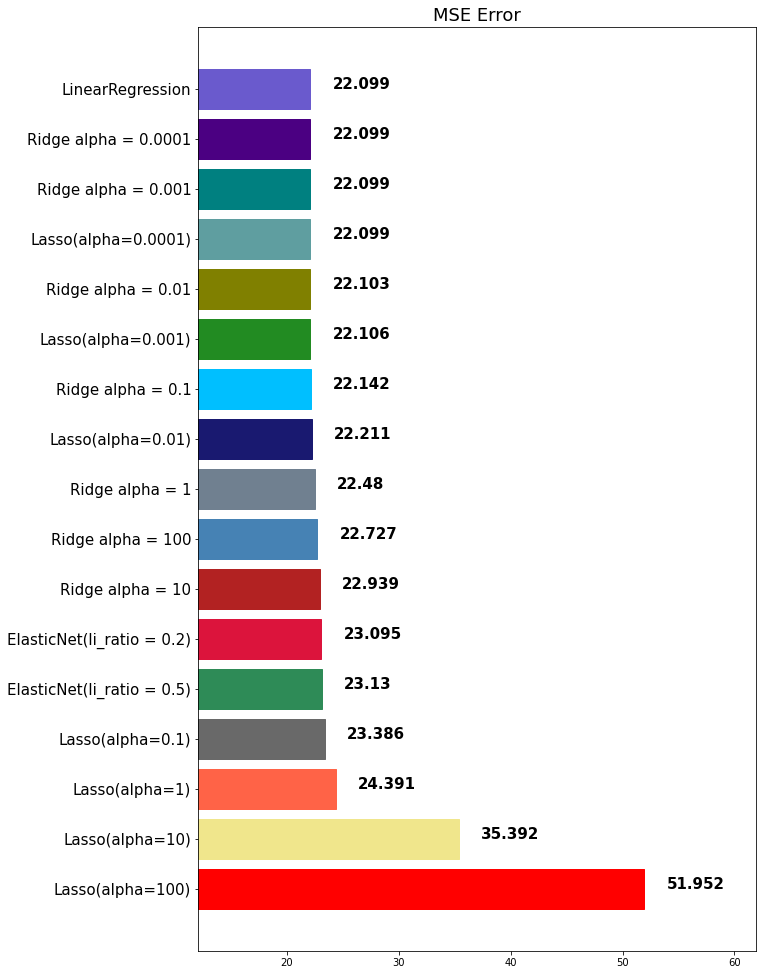

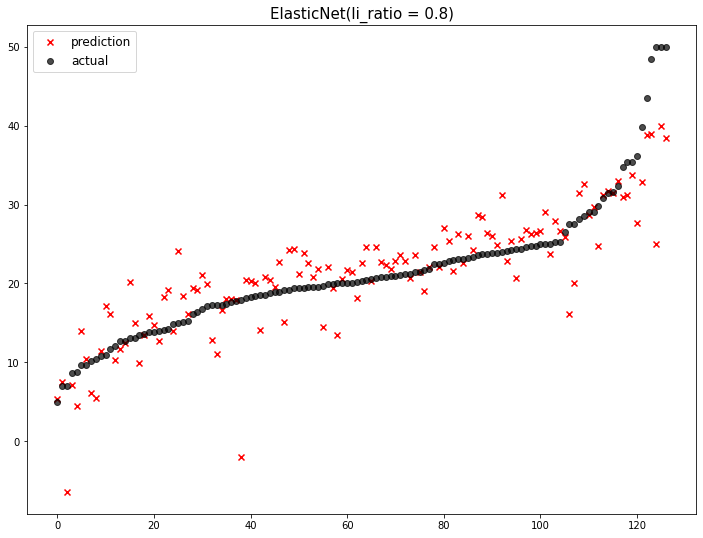

                         model        mse
0             Lasso(alpha=100)  51.951655
1              Lasso(alpha=10)  35.391738
2               Lasso(alpha=1)  24.390753
3             Lasso(alpha=0.1)  23.385884
4   ElasticNet(li_ratio = 0.8)  23.156236
5   ElasticNet(li_ratio = 0.5)  23.130204
6   ElasticNet(li_ratio = 0.2)  23.095135
7             Ridge alpha = 10  22.939229
8            Ridge alpha = 100  22.727346
9              Ridge alpha = 1  22.480476
10           Lasso(alpha=0.01)  22.210557
11           Ridge alpha = 0.1  22.142233
12          Lasso(alpha=0.001)  22.106454
13          Ridge alpha = 0.01  22.102934
14         Lasso(alpha=0.0001)  22.099436
15         Ridge alpha = 0.001  22.099117
16        Ridge alpha = 0.0001  22.098737
17            LinearRegression  22.098695


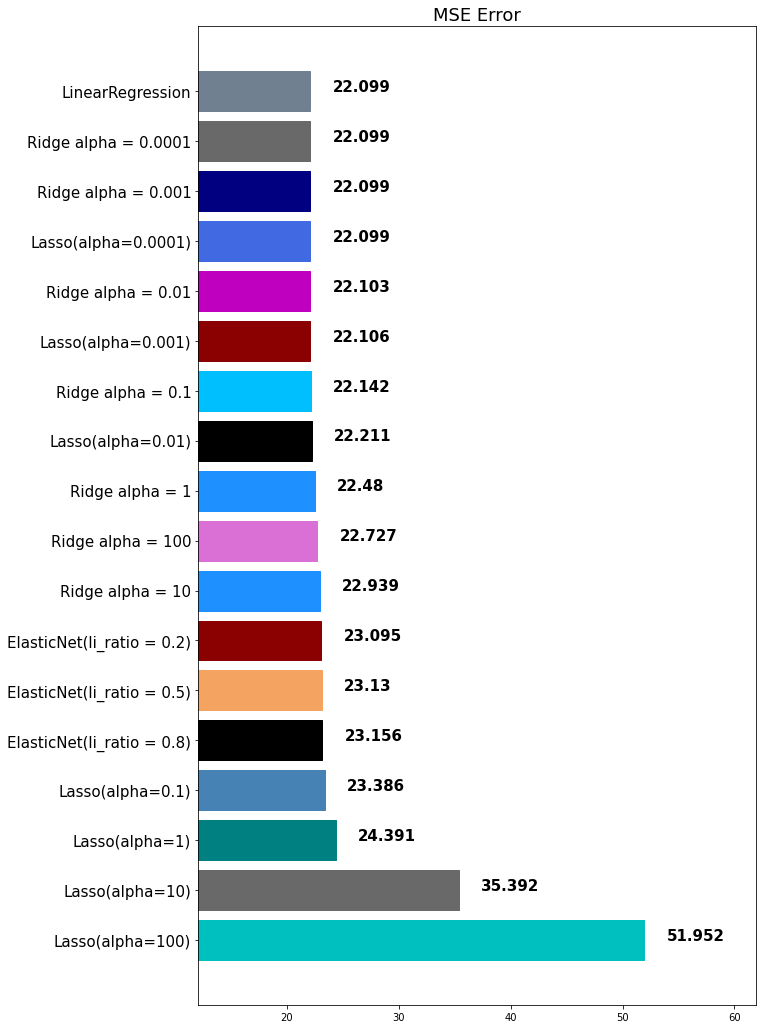

In [36]:
ratios = [0.2, 0.5, 0.8]

for ratio in ratios:
  elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
  elasticnet.fit(X_train, y_train)

  pred = elasticnet.predict(X_test)
  mse_eval('ElasticNet(li_ratio = {})'.format(ratio), pred, y_test)

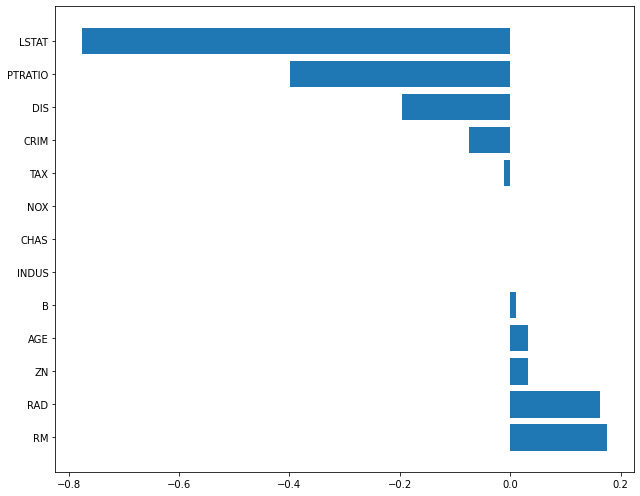

In [37]:
elasticnet20 = ElasticNet(alpha=5, l1_ratio=0.2)
elasticnet20.fit(X_train, y_train)
plot_coef(X_train.columns, elasticnet20.coef_)

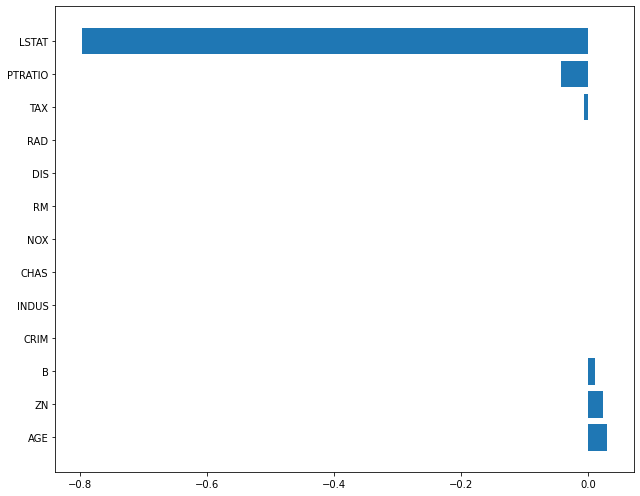

In [38]:
elasticnet80 = ElasticNet(alpha=5, l1_ratio=0.8)
elasticnet80.fit(X_train, y_train)
plot_coef(X_train.columns, elasticnet80.coef_)

In [39]:
elasticnet20.coef_

array([-0.07518138,  0.03195622, -0.        ,  0.        , -0.        ,
        0.17571643,  0.03134237, -0.19558113,  0.16176897, -0.01131618,
       -0.39958007,  0.01092775, -0.77607438])

In [40]:
elasticnet80.coef_

array([-0.        ,  0.02244716, -0.        ,  0.        ,  0.        ,
        0.        ,  0.02970074, -0.        ,  0.        , -0.0069922 ,
       -0.04303373,  0.00965675, -0.79787614])

# Scaler

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

## MinMaxScaler - Normalize(정규화)
컬럼 간에 다른 **min, max**값을 가지는 경우 정규화를 통해서 최대 / 최소의 척도를 하나로 맞춰주는 작업
  * 최소를 0으로, 최대를 1로 설정
-------
**플랫폼 별 영화 평점 다루기**
* 네이버의 영화 평점 (1 ~ 10) : [1, 7, 9, 10, 3]
* 넷플릭스 영화 평점 (1 ~ 5) : [1, 3.5, 4.5, 5, 2.5]

In [42]:
import pandas as pd
movie_score = pd.DataFrame({
    "naver": [1, 7, 9, 10, 3],
    "netflix": [1, 3.5, 4.5, 5, 2.5]
})
movie_score

,naver,netflix
0,1,1.0
1,7,3.5
2,9,4.5
3,10,5.0
4,3,2.5


In [43]:
minmax_scaler = MinMaxScaler()
movie_score_scaled = minmax_scaler.fit_transform(movie_score)

pd.DataFrame(
    movie_score_scaled,
    columns=["Naver Scaled", "Netflix Scaled"]
)

,Naver Scaled,Netflix Scaled
0,0.000000,0.000
1,0.666667,0.625
2,0.888889,0.875
3,1.000000,1.000
4,0.222222,0.375


머신러닝에서는 이제 Naver 영화, Netflix 영화의 점수를 동일하게 가치를 매긴다.

## 표준화 ( Standard Scaling )
**평균이 0, 표준편차가 1**이 되도록 변환

In [44]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

이상치 데이터 보정에 좋다.

In [45]:
import numpy as np
x = np.arange(10)

# 제일 마지막 배열에 이상치 데이터를 추가
x[-1] = 1000

In [46]:
x.mean(), x.std()

(103.6, 298.8100399919654)

평균을 모두 0으로 만들고, 분산(표준편차)을 1로 만든다.

In [47]:
std_scaled_x = std_scaler.fit_transform(x.reshape(-1, 1))
std_scaled_x.mean(), std_scaled_x.std()

(4.4408920985006264e-17, 1.0)

## RobustScaler

`StandardScaler`와 상당히 유사한 스케일링 방법
    * 중앙값이 0, IQR(Inter Qunantile Range)이 1이 되도록 변환

In [48]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(X_train)

In [49]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

# 파이프라인

In [50]:
from sklearn.pipeline import make_pipeline

In [51]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha = 0.1, l1_ratio = 0.2)
)

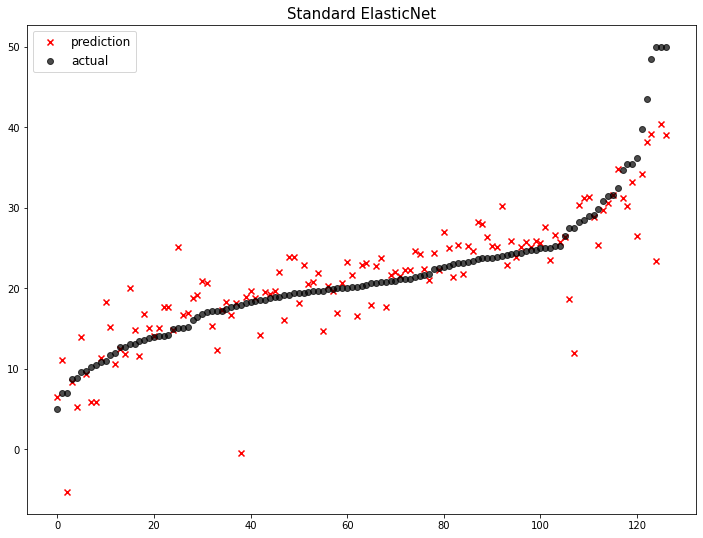

                         model        mse
0             Lasso(alpha=100)  51.951655
1              Lasso(alpha=10)  35.391738
2               Lasso(alpha=1)  24.390753
3             Lasso(alpha=0.1)  23.385884
4   ElasticNet(li_ratio = 0.8)  23.156236
5   ElasticNet(li_ratio = 0.5)  23.130204
6   ElasticNet(li_ratio = 0.2)  23.095135
7             Ridge alpha = 10  22.939229
8            Ridge alpha = 100  22.727346
9          Standard ElasticNet  22.694970
10             Ridge alpha = 1  22.480476
11           Lasso(alpha=0.01)  22.210557
12           Ridge alpha = 0.1  22.142233
13          Lasso(alpha=0.001)  22.106454
14          Ridge alpha = 0.01  22.102934
15         Lasso(alpha=0.0001)  22.099436
16         Ridge alpha = 0.001  22.099117
17        Ridge alpha = 0.0001  22.098737
18            LinearRegression  22.098695


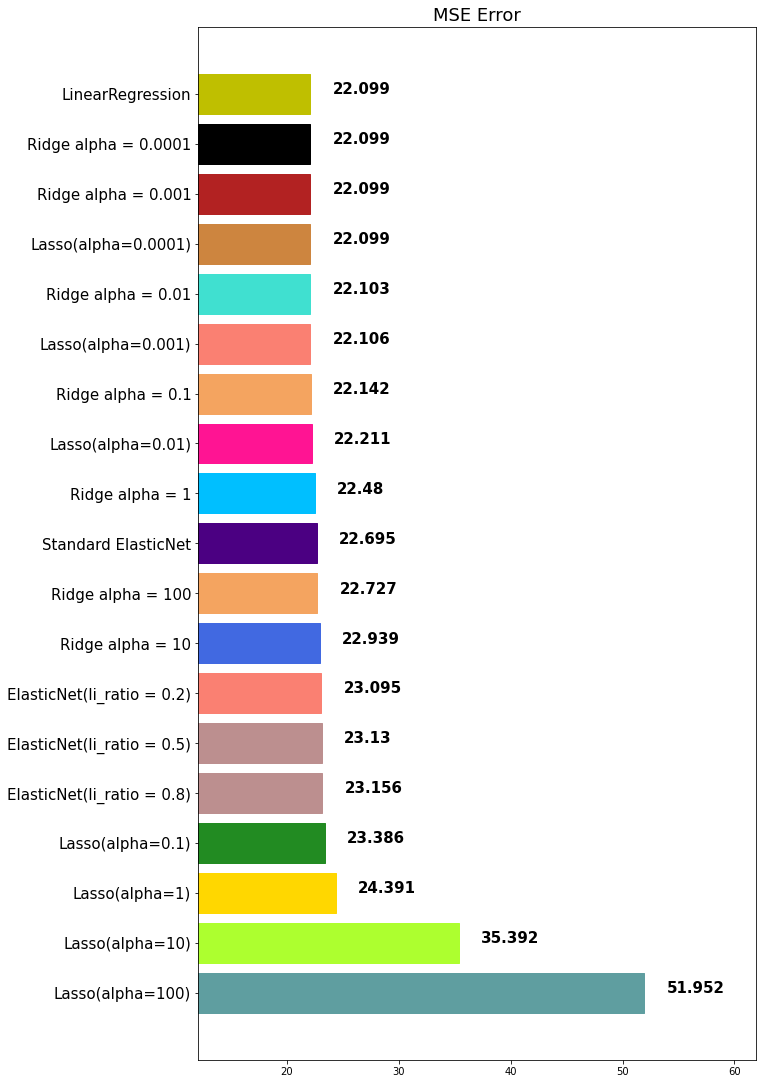

In [52]:
elasticnet_pred = elasticnet_pipeline.fit(X_train, y_train).predict(X_test)
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

# 다항식 특성

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**

feature가 x1, x2가 있다고 가정하면 다항식을 추가 하게 되면[1, x1, x2, x1^2, x1x2, x2^2]

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias = False) # degree : 몇차식까지 만들 것인가.

In [56]:
poly_features = poly.fit_transform(X_train)[0]
poly_features

array([9.10300000e-02, 0.00000000e+00, 2.46000000e+00, 0.00000000e+00,
       4.88000000e-01, 7.15500000e+00, 9.22000000e+01, 2.70060000e+00,
       3.00000000e+00, 1.93000000e+02, 1.78000000e+01, 3.94120000e+02,
       4.82000000e+00, 8.28646090e-03, 0.00000000e+00, 2.23933800e-01,
       0.00000000e+00, 4.44226400e-02, 6.51319650e-01, 8.39296600e+00,
       2.45835618e-01, 2.73090000e-01, 1.75687900e+01, 1.62033400e+00,
       3.58767436e+01, 4.38764600e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.05160000e+00, 0.00000000e+00,
       1.20048000e+00, 1.76013000e+01, 2.26812000e+02, 6.64347600e+00,
       7.38000000e+00, 4.74780000e+02, 4.37880000e+01, 9.69535200e+02,
       1.18572000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [59]:
# 다항식 추가 파이프라인 추가하기
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree = 2, include_bias = False),
    StandardScaler(),
    ElasticNet(alpha = 0.1, l1_ratio = 0.2)
)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.81611758843428, tolerance: 3.361037625329816
  positive)


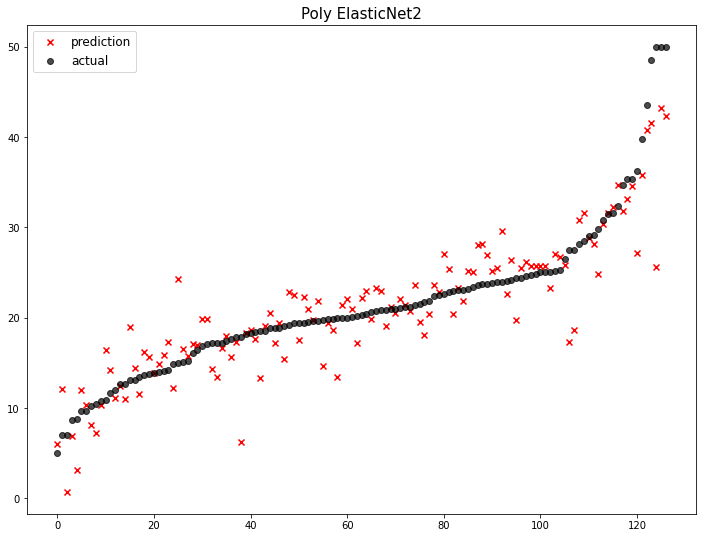

                         model        mse
0             Lasso(alpha=100)  51.951655
1              Lasso(alpha=10)  35.391738
2               Lasso(alpha=1)  24.390753
3             Lasso(alpha=0.1)  23.385884
4   ElasticNet(li_ratio = 0.8)  23.156236
5   ElasticNet(li_ratio = 0.5)  23.130204
6   ElasticNet(li_ratio = 0.2)  23.095135
7             Ridge alpha = 10  22.939229
8            Ridge alpha = 100  22.727346
9          Standard ElasticNet  22.694970
10             Ridge alpha = 1  22.480476
11           Lasso(alpha=0.01)  22.210557
12           Ridge alpha = 0.1  22.142233
13          Lasso(alpha=0.001)  22.106454
14          Ridge alpha = 0.01  22.102934
15         Lasso(alpha=0.0001)  22.099436
16         Ridge alpha = 0.001  22.099117
17        Ridge alpha = 0.0001  22.098737
18            LinearRegression  22.098695
19            Poly ElasticNet2  15.710492
20             Poly ElasticNet  10.490313


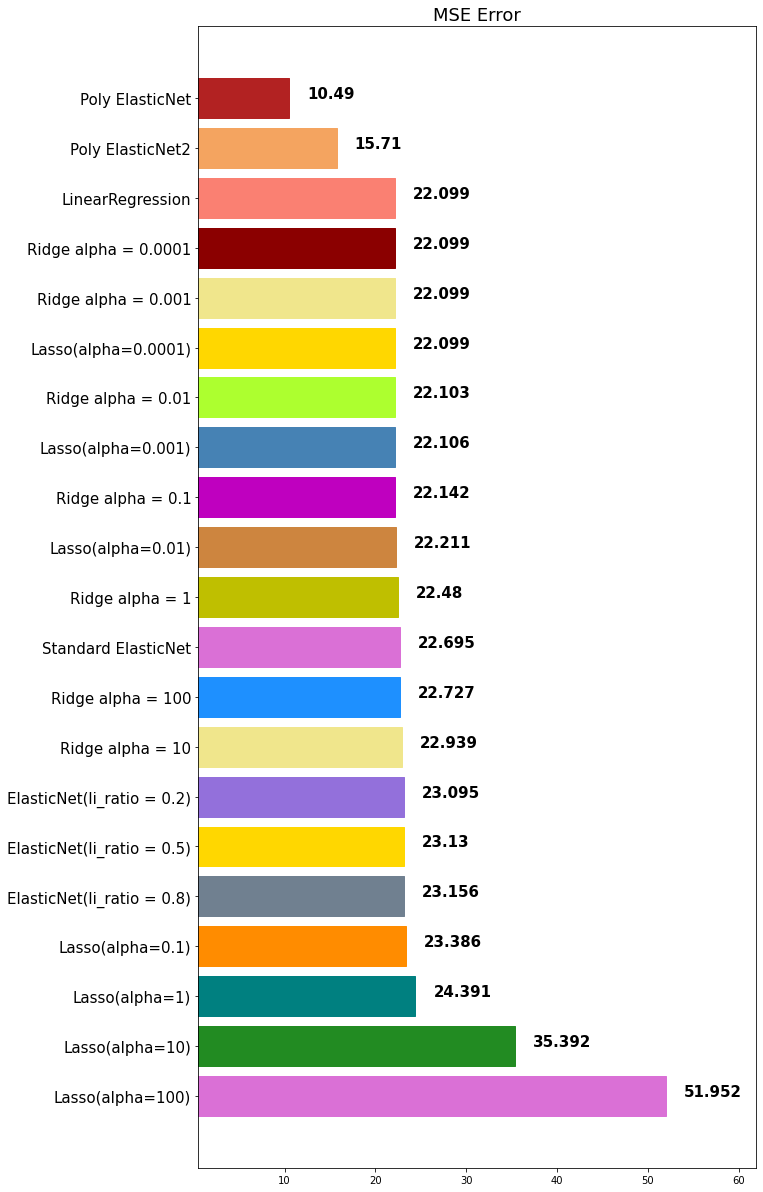

In [60]:
poly_pred = poly_pipeline.fit(X_train,y_train).predict(X_test)
mse_eval('Poly ElasticNet2', poly_pred, y_test)